### Initialisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utils import *

from generate_data import dataGenerator

from ellipsoid_predictor import *

from plot import *

seed_everything(42)

In [15]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

k = 3

p = 0.5

y_train = generate_uniform_points_in_p_norm_ball(n_train, k, p)

y_test = y_train
y_calibration = y_train

In [16]:
seed_everything(42)

alpha = 0.1

ellipsoid_predictor = EllipsoidPredictor()
ellipsoid_predictor.fit(y_train, alpha)
ellipsoid_predictor.conformalize(y_calibration, alpha)


print("ellipsoid_predictor volume : ", ellipsoid_predictor.get_volume())


Network with  1 hidden layers and a hidden dimension of  128
ellipsoid_predictor volume :  0.09202052606960796


/var/folders/z9/c18gf3b53l57gx2mb36lp9vnx5h51x/T/ipykernel_58746/3058370497.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


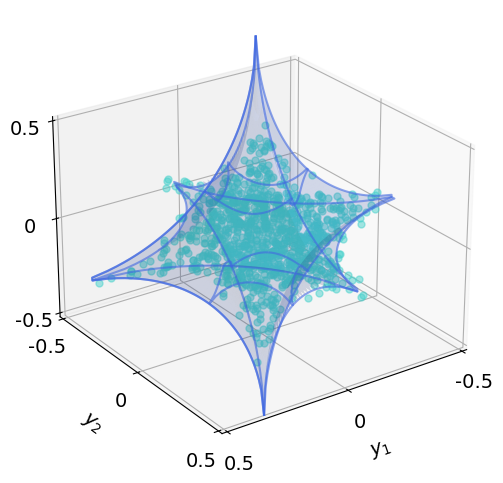

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création de la figure et de l'axe 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


# Ajustement de la perspective
ax.view_init(elev=25, azim=55)

ax.plot(*y_train.T, 'o', color='mediumturquoise', alpha=0.5, label='Data points', markersize=5)

ellipse_surface = surface_ellipse_3d(
    ellipsoid_predictor.mu, 
    ellipsoid_predictor.Lambda, 
    ellipsoid_predictor.q, 
    ellipsoid_predictor.nu
)

ax.plot_surface(ellipse_surface[0], ellipse_surface[1], ellipse_surface[2], color='royalblue', alpha=0.1, label='Ellipsoid')
ax.plot_wireframe(ellipse_surface[0], ellipse_surface[1], ellipse_surface[2], color='royalblue', alpha=0.6, label='Ellipsoid', rstride=50, cstride=50) 

# Personnalisation des axes
ax.set_xlabel(r"$y_1$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$y_2$", fontsize=14, labelpad=10)
ax.set_zlabel(r"$y_3$", fontsize=14, labelpad=10)

ax.xaxis.set_tick_params(width=10, size=5, direction='out')
ax.yaxis.set_tick_params(width=10, size=5, direction='out')
ax.zaxis.set_tick_params(width=10, size=5, direction='out')

# Décalage des ticks pour ne pas commencer à 0
ax.set_xticks(np.linspace(-0.5, 0.5, 5))
ax.set_yticks(np.linspace(-0.5, 0.5, 5))
ax.set_zticks(np.linspace(-0.5, 0.5, 5))

xticks = [-0.5, 0, 0.5]
yticks = [-0.5, 0, 0.5]
zticks = [-0.5, 0, 0.5]

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_zticks(zticks)

# Définition des labels avec la bonne taille
ax.set_xticklabels(xticks, fontsize=14)
ax.set_yticklabels(yticks, fontsize=14)
ax.set_zticklabels(zticks, fontsize=14)

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)

plt.tight_layout()

plt.savefig(f"../figs/2.2.3D.ball0.5with_surface_p={ellipsoid_predictor.q:.2f}.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [6]:
seed_everything(42)

n_train = 1000
n_test = 1000
n_calibration = 1000

k = 3
d = 3
perturbation = "exponential"
data_generator = dataGenerator(d, k, perturbation)
y_train, y_test, y_calibration = data_generator.generate_perturbation_train_calibration_test(n_train, n_test, n_calibration)
y_test = y_train
y_calibration = y_train


In [7]:
seed_everything(42)

alpha = 0.1

ellipsoid_predictor = EllipsoidPredictor()
ellipsoid_predictor.fit(y_train, alpha, num_epochs_our_loss=3000)
ellipsoid_predictor.conformalize(y_calibration, alpha)

print("ellipsoid_predictor volume : ", ellipsoid_predictor.get_volume())

Network with  1 hidden layers and a hidden dimension of  128
ellipsoid_predictor volume :  43.15063268325156


/var/folders/z9/c18gf3b53l57gx2mb36lp9vnx5h51x/T/ipykernel_58746/432073931.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


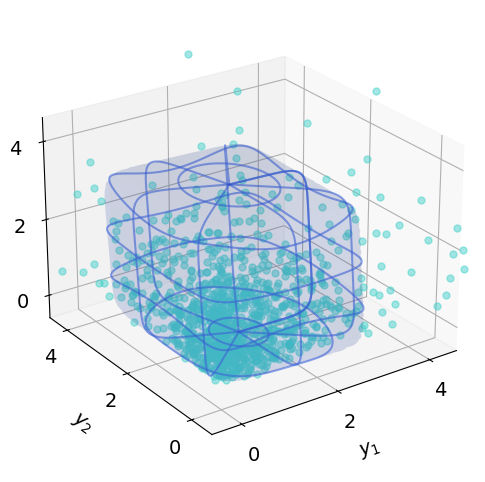

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création de la figure et de l'axe 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


ax.view_init(elev=25, azim=235)

ax.plot(*y_train.T, 'o', color='mediumturquoise', alpha=0.5, label='Data points', markersize=5)

ellipse_surface = surface_ellipse_3d(
    ellipsoid_predictor.mu, 
    ellipsoid_predictor.Lambda, 
    ellipsoid_predictor.q, 
    ellipsoid_predictor.nu
)

ax.plot_surface(ellipse_surface[0], ellipse_surface[1], ellipse_surface[2], color='royalblue', alpha=0.1, label='Ellipsoid')
ax.plot_wireframe(ellipse_surface[0], ellipse_surface[1], ellipse_surface[2], color='royalblue', alpha=0.6, label='Ellipsoid', rstride=30, cstride=30) 

# Personnalisation des axes
ax.set_xlabel(r"$y_1$", fontsize=14, labelpad=10)
ax.set_ylabel(r"$y_2$", fontsize=14, labelpad=10)
ax.set_zlabel(r"$y_3$", fontsize=14, labelpad=10)

ax.xaxis.set_tick_params(width=100, size=5, direction='out')
ax.yaxis.set_tick_params(width=10, size=5, direction='out')
ax.zaxis.set_tick_params(width=10, size=5, direction='out')

xticks = [0, 2, 4]
yticks = [0, 2, 4]
zticks = [0, 2, 4]

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_zticks(zticks)

# Définition des labels avec la bonne taille
ax.set_xticklabels(xticks, fontsize=14)
ax.set_yticklabels(yticks, fontsize=14)
ax.set_zticklabels(zticks, fontsize=14)

ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)
ax.set_zlim(-0.5, 4.5)

plt.tight_layout()

plt.savefig(f"../figs/2.2.3D.exponential_with_surface_p={ellipsoid_predictor.q:.2f}.pdf", bbox_inches='tight', dpi=300)
plt.show()
